In [18]:
pd.set_option('display.max_columns',1000)

C:\Users\ashik\codes\breast_cancer_cluster\benv\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\ashik\codes\breast_cancer_cluster\benv\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


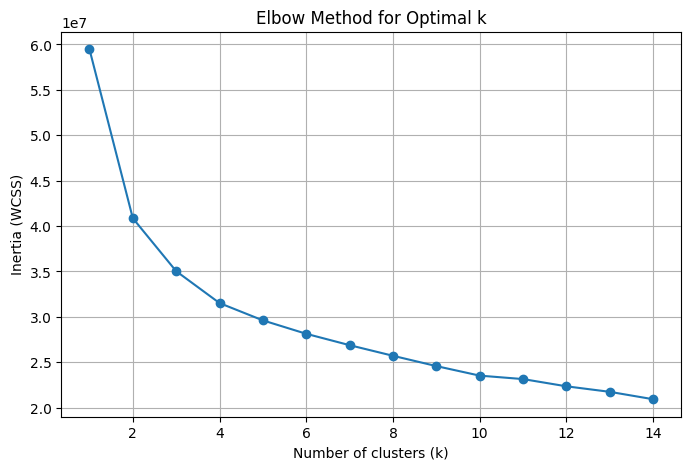

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('data/cancer.csv', low_memory=False)


cols = list(data.columns.values)
genoms = cols[31:] 
df = data[genoms]  
mut_col = cols[520:]  

label_encoder = LabelEncoder()
for col in mut_col:
    df.loc[:, col] = label_encoder.fit_transform(df[col])

from sklearn.decomposition import PCA
pca = PCA(n_components=0.95) 
X_reduced = pca.fit_transform(df)
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


inertia = []


for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_reduced)
    inertia.append(kmeans.inertia_)  


plt.figure(figsize=(8, 5))
plt.plot(range(1, 15), inertia, marker='o')  # Adjust range to match inertia list (1 to 14)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.grid(True)
plt.show()


In [2]:
print(f'Number of components retained: {pca.n_components_}')


Number of components retained: 31


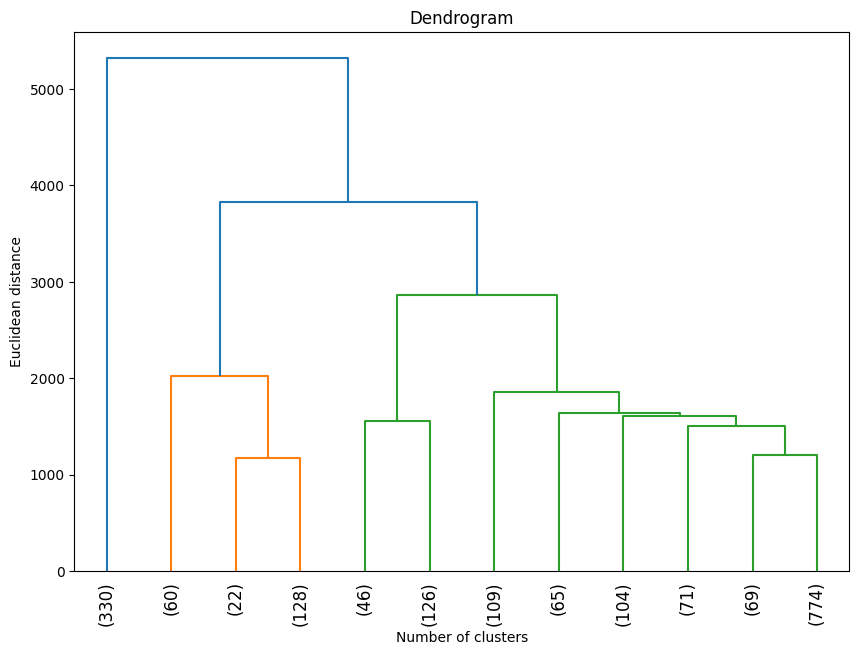

In [65]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
# Load and preprocess data (same as before)
data = pd.read_csv('data/cancer.csv', low_memory=False)
cols = list(data.columns.values)
genoms = cols[31:]
df = data[genoms]
mut_col = cols[520:]

# Label encoding
label_encoder = LabelEncoder()
for col in mut_col:
    df.loc[:, col] = label_encoder.fit_transform(df[col])

# PCA for dimensionality reduction
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(df)

# Compute the linkage matrix
Z = linkage(X_reduced, method='ward')  # 'ward' minimizes variance within clusters
plt.figure(figsize=(10, 7))
dendrogram(Z, truncate_mode='lastp', p=12, leaf_rotation=90., leaf_font_size=12.)
plt.title('Dendrogram')
plt.xlabel('Number of clusters')
plt.ylabel('Euclidean distance')
plt.show()


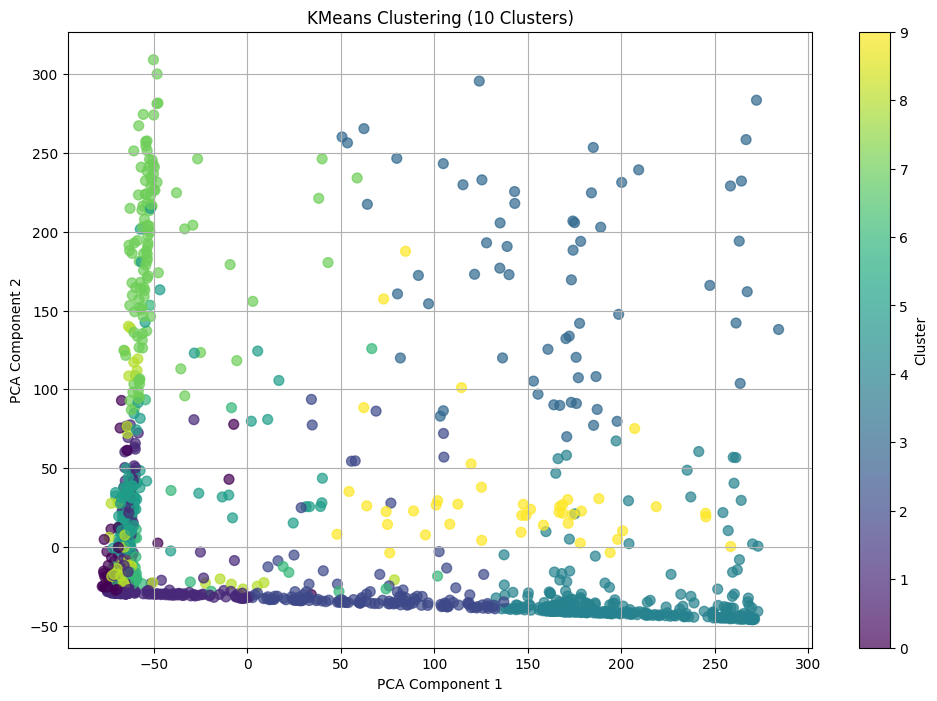

In [66]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load and preprocess data
data = pd.read_csv('data/cancer.csv', low_memory=False)
cols = list(data.columns.values)
genoms = cols[31:]
df = data[genoms]
mut_col = cols[520:]

# Label encoding
label_encoder = LabelEncoder()
for col in mut_col:
    df.loc[:, col] = label_encoder.fit_transform(df[col])

# PCA for dimensionality reduction
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(df)

# KMeans clustering with 10 clusters
kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_reduced)

# Plotting the clusters
plt.figure(figsize=(12, 8))

# Scatter plot for first two PCA components
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=clusters, cmap='viridis', marker='o', s=50, alpha=0.7)
plt.title('KMeans Clustering (10 Clusters)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


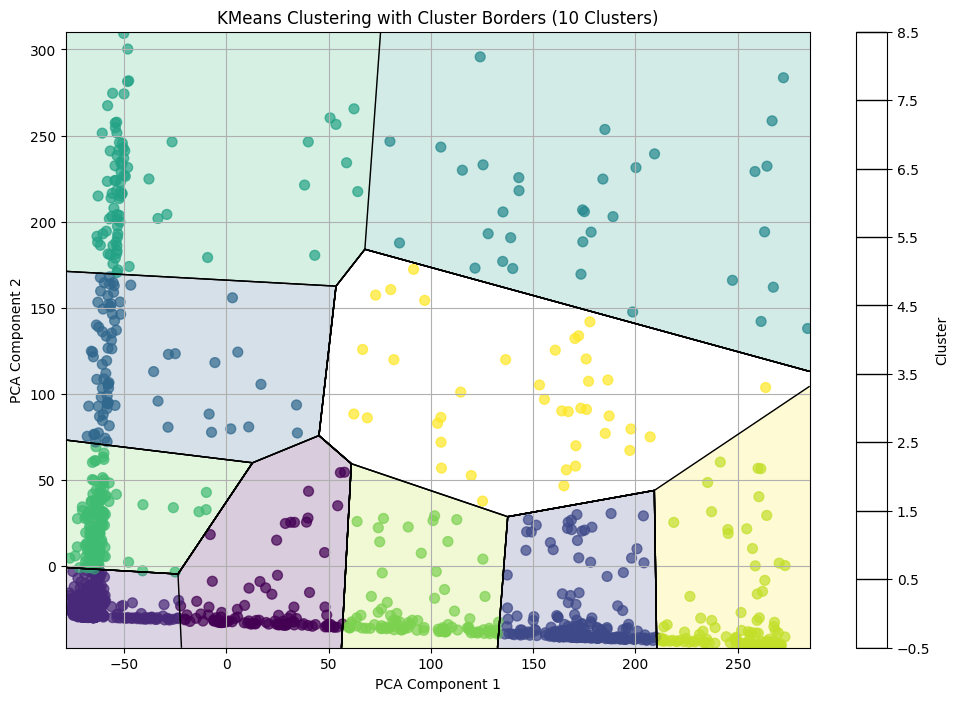

In [68]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load and preprocess data
data = pd.read_csv('data/cancer.csv', low_memory=False)
cols = list(data.columns.values)
genoms = cols[31:]
df = data[genoms]
mut_col = cols[520:]

# Label encoding
label_encoder = LabelEncoder()
for col in mut_col:
    df.loc[:, col] = label_encoder.fit_transform(df[col])

# PCA for dimensionality reduction
pca = PCA(n_components=2)  # Use 2 components for visualization
X_reduced = pca.fit_transform(df)

# KMeans clustering with 10 clusters
kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_reduced)

# Define a colormap
cmap = plt.get_cmap('viridis', 10)

# Plotting the clusters
plt.figure(figsize=(12, 8))

# Scatter plot for the first two PCA components
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=clusters, cmap=cmap, marker='o', s=50, alpha=0.7)

# Plot decision boundaries
h = .02  # Step size in the mesh
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict clusters for each point in the mesh grid
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot contours
plt.contourf(xx, yy, Z, alpha=0.2, cmap=cmap, levels=np.arange(10) - 0.5)
plt.contour(xx, yy, Z, colors='k', levels=np.arange(10) - 0.5, linewidths=1)

plt.title('KMeans Clustering with Cluster Borders (10 Clusters)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()
